<a href="https://colab.research.google.com/github/Jtrep10/NTK_Experiments/blob/main/testNTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
pip install jax jaxlib neural-tangents matplotlib

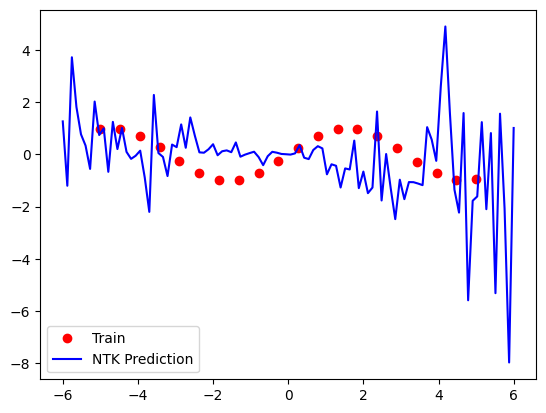

In [54]:
import jax
import jax.numpy as jnp
from neural_tangents import stax

#Create perceptron with Relu
init_fn, apply_fn, kernel_fn = stax.serial(
    stax.Dense(1024), stax.Relu(),
    stax.Dense(1024), stax.Relu(),
    stax.Dense(1)
)

#Model after sin function,
#20 points between -5 and 5 (reshape into column vector)
x_train = jnp.linspace(-5, 5, 20).reshape(-1, 1)
y_train = jnp.sin(x_train)

x_test = jnp.linspace(-6, 6, 100).reshape(-1, 1)

#Create train data with NTK
kernel_train_train = kernel_fn(x_train, x_train, 'ntk')
kernel_test_train = kernel_fn(x_test, x_train, 'ntk')

#Predict with train data
lambda_reg = 1e-3
K_inv = jnp.linalg.inv(kernel_train_train + lambda_reg * jnp.eye(len(x_train)))
y_pred = kernel_test_train @ K_inv @ y_train

#Visualize contrast
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x_train, y_train, 'ro', label='Train')
plt.plot(x_test, y_pred, 'b-', label='NTK Prediction')
plt.legend()
plt.show()

NKT prediction of a sine function or quadratic function performs very poorly without regularization.

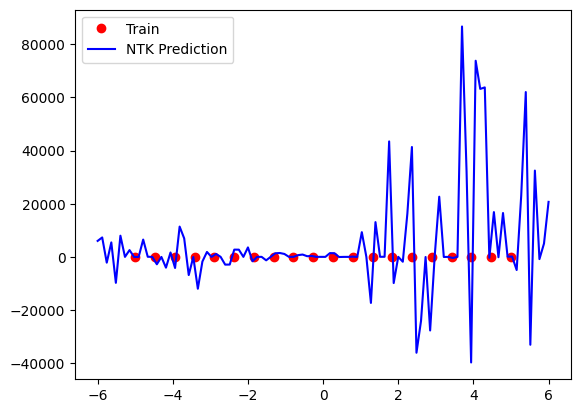

In [55]:
# try without regularization
#Create perceptron with Relu
init_fn, apply_fn, kernel_fn = stax.serial(
    stax.Dense(128), stax.Relu(),
    stax.Dense(128), stax.Relu(),
    stax.Dense(1)
)

#Model after sin function,
#20 points between -5 and 5 (reshape into column vector)
x_train = jnp.linspace(-5, 5, 20).reshape(-1, 1)
y_train = jnp.sin(x_train)

x_test = jnp.linspace(-6, 6, 100).reshape(-1, 1)

#Create train data with NTK
kernel_train_train = kernel_fn(x_train, x_train, 'ntk')
kernel_test_train = kernel_fn(x_test, x_train, 'ntk')

#Predict with train data
lambda_reg = 0
K_inv = jnp.linalg.inv(kernel_train_train + lambda_reg * jnp.eye(len(x_train)))
y_pred = kernel_test_train @ K_inv @ y_train

#Visualize contrast
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x_train, y_train, 'ro', label='Train')
plt.plot(x_test, y_pred, 'b-', label='NTK Prediction')
plt.legend()
plt.show()

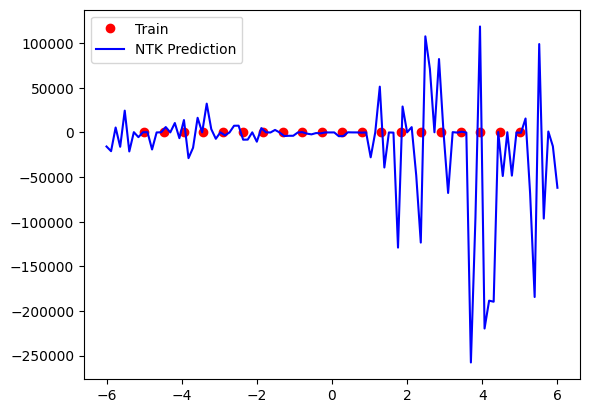

In [56]:
# try without regularization
#Create perceptron with Relu
init_fn, apply_fn, kernel_fn = stax.serial(
    stax.Dense(128), stax.Relu(),
    stax.Dense(128), stax.Relu(),
    stax.Dense(1)
)

#Model after sin function,
#20 points between -5 and 5 (reshape into column vector)
x_train = jnp.linspace(-5, 5, 20).reshape(-1, 1)
y_train = jnp.square(x_train)

x_test = jnp.linspace(-6, 6, 100).reshape(-1, 1)

#Create train data with NTK
kernel_train_train = kernel_fn(x_train, x_train, 'ntk')
kernel_test_train = kernel_fn(x_test, x_train, 'ntk')

#Predict with train data
lambda_reg = 0
K_inv = jnp.linalg.inv(kernel_train_train + lambda_reg * jnp.eye(len(x_train)))
y_pred = kernel_test_train @ K_inv @ y_train

#Visualize contrast
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x_train, y_train, 'ro', label='Train')
plt.plot(x_test, y_pred, 'b-', label='NTK Prediction')
plt.legend()
plt.show()

Try alternative activations (with regularization). Gelu and Gabor perform much better.

---



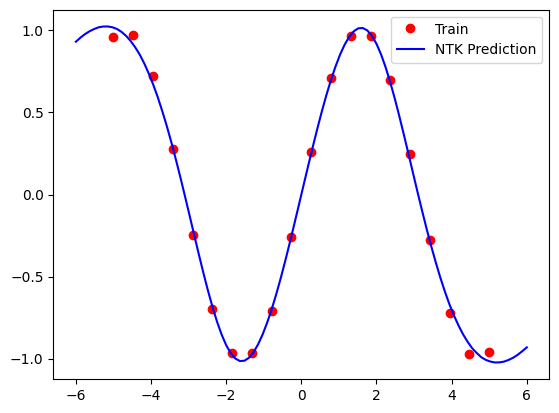

In [57]:
# try with different activations
act=stax.Gelu()

init_fn, apply_fn, kernel_fn = stax.serial(
    stax.Dense(128), act,
    stax.Dense(128), act,
    stax.Dense(1)
)

#Model after sin function,
#20 points between -5 and 5 (reshape into column vector)
x_train = jnp.linspace(-5, 5, 20).reshape(-1, 1)
y_train = jnp.sin(x_train)

x_test = jnp.linspace(-6, 6, 100).reshape(-1, 1)

#Create train data with NTK
kernel_train_train = kernel_fn(x_train, x_train, 'ntk')
kernel_test_train = kernel_fn(x_test, x_train, 'ntk')

#Predict with train data
lambda_reg = 1e-3
K_inv = jnp.linalg.inv(kernel_train_train + lambda_reg * jnp.eye(len(x_train)))
y_pred = kernel_test_train @ K_inv @ y_train

#Visualize contrast
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x_train, y_train, 'ro', label='Train')
plt.plot(x_test, y_pred, 'b-', label='NTK Prediction')
plt.legend()
plt.show()

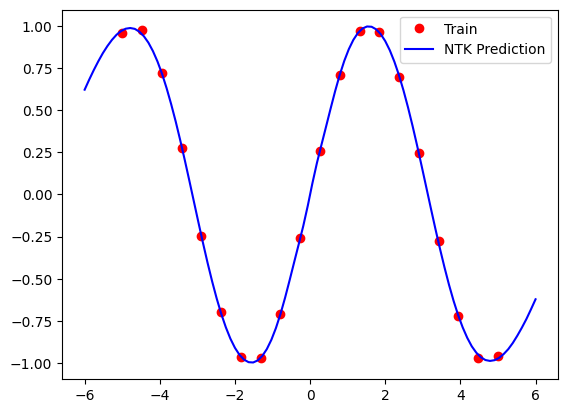

In [58]:
# try with different activations
act=stax.Gabor()

init_fn, apply_fn, kernel_fn = stax.serial(
    stax.Dense(128), act,
    stax.Dense(128), act,
    stax.Dense(1)
)

#Model after sin function,
#20 points between -5 and 5 (reshape into column vector)
x_train = jnp.linspace(-5, 5, 20).reshape(-1, 1)
y_train = jnp.sin(x_train)

x_test = jnp.linspace(-6, 6, 100).reshape(-1, 1)

#Create train data with NTK
kernel_train_train = kernel_fn(x_train, x_train, 'ntk')
kernel_test_train = kernel_fn(x_test, x_train, 'ntk')

#Predict with train data
lambda_reg = 1e-3
K_inv = jnp.linalg.inv(kernel_train_train + lambda_reg * jnp.eye(len(x_train)))
y_pred = kernel_test_train @ K_inv @ y_train

#Visualize contrast
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x_train, y_train, 'ro', label='Train')
plt.plot(x_test, y_pred, 'b-', label='NTK Prediction')
plt.legend()
plt.show()


Without regularization, Gabor performs poorly but does not blow up.
---



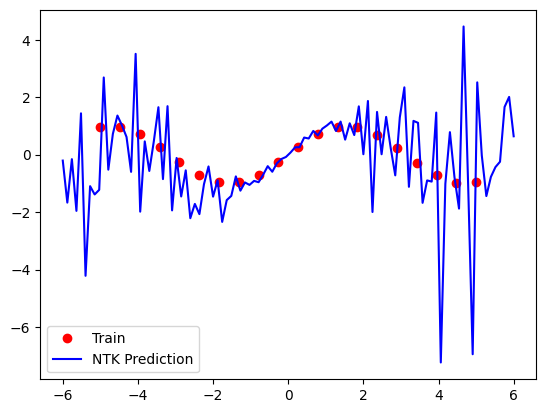

In [59]:
# try with different activations
act=stax.Gabor()

init_fn, apply_fn, kernel_fn = stax.serial(
    stax.Dense(128), act,
    stax.Dense(128), act,
    stax.Dense(1)
)

#Model after sin function,
#20 points between -5 and 5 (reshape into column vector)
x_train = jnp.linspace(-5, 5, 20).reshape(-1, 1)
y_train = jnp.sin(x_train)

x_test = jnp.linspace(-6, 6, 100).reshape(-1, 1)

#Create train data with NTK
kernel_train_train = kernel_fn(x_train, x_train, 'ntk')
kernel_test_train = kernel_fn(x_test, x_train, 'ntk')

#Predict with train data
lambda_reg = 0
K_inv = jnp.linalg.inv(kernel_train_train + lambda_reg * jnp.eye(len(x_train)))
y_pred = kernel_test_train @ K_inv @ y_train

#Visualize contrast
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x_train, y_train, 'ro', label='Train')
plt.plot(x_test, y_pred, 'b-', label='NTK Prediction')
plt.legend()
plt.show()

Empirical NKTs. Using code from https://colab.research.google.com/github/google/neural-tangents/blob/main/notebooks/empirical_ntk_fcn.ipynb#scrollTo=lPh5LGz9JBK_.

Here, I use batch size = 1 and plot the distribution of the eigenvalue magnitude of the NKTs. Smaller widths tend to have a less concentrated eigenvalue distribution.

In [60]:
from jax import jit
from jax import numpy as jnp
from jax import random

import neural_tangents as nt
from neural_tangents import stax

In [61]:
def get_ntk_fns(O: int, width:int):
  # Define an FCN.
  init_fn, apply_fn, _ = stax.serial(
      stax.Dense(width),
      stax.Relu(),
      stax.Dense(width),
      stax.Relu(),
      stax.Dense(width),
      stax.Relu(),
      stax.Dense(O)
  )

  kwargs = dict(
      f=apply_fn,
      trace_axes=(),
      vmap_axes=0
  )

  # Different NTK implementations
  jacobian_contraction = jit(nt.empirical_ntk_fn(
      **kwargs, implementation=nt.NtkImplementation.JACOBIAN_CONTRACTION))
  ntvp = jit(nt.empirical_ntk_fn(
      **kwargs, implementation=nt.NtkImplementation.NTK_VECTOR_PRODUCTS))
  str_derivatives = jit(nt.empirical_ntk_fn(
      **kwargs, implementation=nt.NtkImplementation.STRUCTURED_DERIVATIVES))
  auto = jit(nt.empirical_ntk_fn(
      **kwargs, implementation=nt.NtkImplementation.AUTO))

  # Parameters \theta
  _, params = init_fn(random.PRNGKey(0), x1.shape)
  return params, (jacobian_contraction, ntvp, str_derivatives, auto)

Text(0.5, 1.0, 'NTK Eigenvalue Distribution, Width=2048')

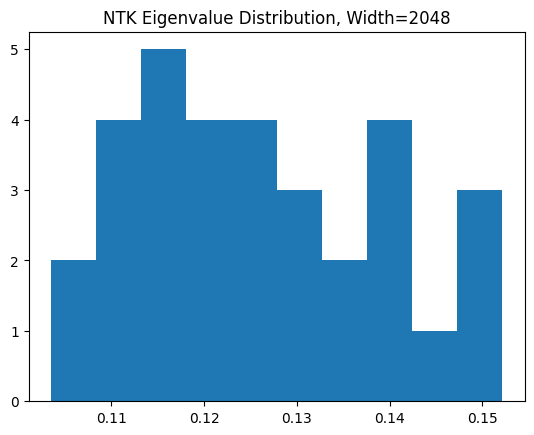

In [62]:
width=2048 # matching sample notebook code
O = 32 # Consdier 1x1 output
N = 1 # consider case of just one input (batch size=1)

# Input images x
input_shape = (3072,)
k1, k2 = random.split(random.PRNGKey(1), 2)
x1 = random.normal(k1, (N, *input_shape))
x2 = random.normal(k2, (N, *input_shape))

params, (ntk_fn_jacobian_contraction, ntk_fn_ntvp, ntk_fn_str_derivatives, ntk_fn_auto) = get_ntk_fns(O=O, width=width)

# NTK-vector products
k = ntk_fn_ntvp(x1, x2, params).squeeze()
(lambdas,_) = jnp.linalg.eig(k)
plt.figure
plt.hist(jnp.abs(lambdas))
plt.title(f"NTK Eigenvalue Distribution, Width={width}")


Text(0.5, 1.0, 'NTK Eigenvalue Distribution, Width=1024')

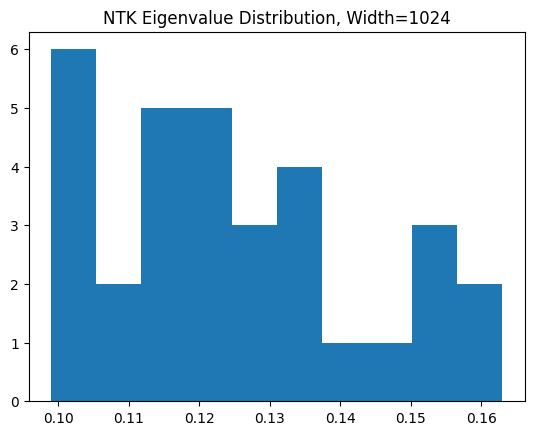

In [63]:
width=1024 # matching sample notebook code
O = 32 # Consdier 1x1 output
N = 1 # consider case of just one input (batch size=1)

# Input images x
input_shape = (3072,)
k1, k2 = random.split(random.PRNGKey(1), 2)
x1 = random.normal(k1, (N, *input_shape))
x2 = random.normal(k2, (N, *input_shape))

params, (ntk_fn_jacobian_contraction, ntk_fn_ntvp, ntk_fn_str_derivatives, ntk_fn_auto) = get_ntk_fns(O=O, width=width)

# NTK-vector products
k = ntk_fn_ntvp(x1, x2, params).squeeze()
(lambdas,_) = jnp.linalg.eig(k)
plt.figure
plt.hist(jnp.abs(lambdas))
plt.title(f"NTK Eigenvalue Distribution, Width={width}")


Text(0.5, 1.0, 'NTK Eigenvalue Distribution, Width=256')

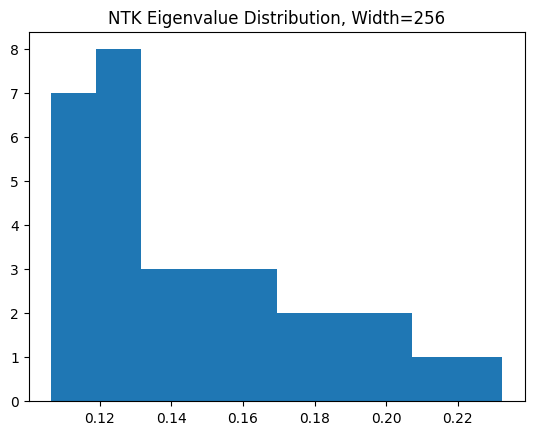

In [64]:
width=256 # matching sample notebook code
O = 32 # Consdier 1x1 output
N = 1 # consider case of just one input (batch size=1)

# Input images x
input_shape = (3072,)
k1, k2 = random.split(random.PRNGKey(1), 2)
x1 = random.normal(k1, (N, *input_shape))
x2 = random.normal(k2, (N, *input_shape))

params, (ntk_fn_jacobian_contraction, ntk_fn_ntvp, ntk_fn_str_derivatives, ntk_fn_auto) = get_ntk_fns(O=O, width=width)

# NTK-vector products
k = ntk_fn_ntvp(x1, x2, params).squeeze()
(lambdas,_) = jnp.linalg.eig(k)
plt.figure
plt.hist(jnp.abs(lambdas))
plt.title(f"NTK Eigenvalue Distribution, Width={width}")


Text(0.5, 1.0, 'NTK Eigenvalue Distribution, Width=16')

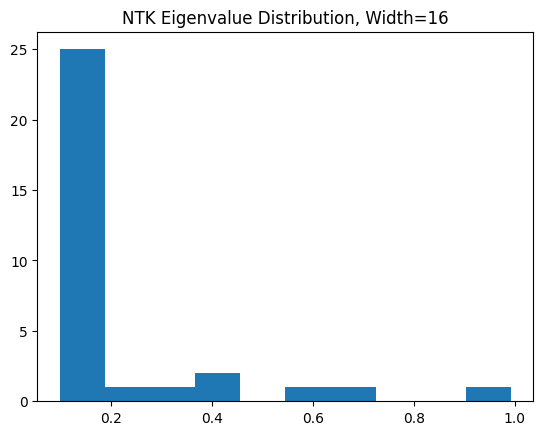

In [65]:
width=16 # matching sample notebook code
O = 32 # Consdier 1x1 output
N = 1 # consider case of just one input (batch size=1)

# Input images x
input_shape = (3072,)
k1, k2 = random.split(random.PRNGKey(1), 2)
x1 = random.normal(k1, (N, *input_shape))
x2 = random.normal(k2, (N, *input_shape))

params, (ntk_fn_jacobian_contraction, ntk_fn_ntvp, ntk_fn_str_derivatives, ntk_fn_auto) = get_ntk_fns(O=O, width=width)

# NTK-vector products
k = ntk_fn_ntvp(x1, x2, params).squeeze()
(lambdas,_) = jnp.linalg.eig(k)
plt.figure
plt.hist(jnp.abs(lambdas))
plt.title(f"NTK Eigenvalue Distribution, Width={width}")
